# Project: Predicting the 2021 NBA Finals Champion using a SKLearn Decision Tree Regressor

I trained a decision tree regression model to learn data from the past 5 years, since the 2014-2015 season. I didn't go back any farther because 2014-2015 was the season when most teams starting attempting about 30 threes a game, and if I went back any farther my model would have preferred teams with a better mid range game rather than teams who shoot better from 3. 

In [1]:
##Author: Nishank Rainghani

##Data from Sports Reference, csv created by Nishank

##Import neccessary packages and modules
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import tree
from sklearn.preprocessing import scale


##load in your data using the pandas module
pastDataDF = pd.read_csv("nbaadvancedstats22.csv")
currentDataDF = pd.read_csv("nbacurrentstats11.csv")
print(pastDataDF)
##clean up your data so all of it is scaled
##THIS IS THE MOST IMPORTANT PART
##If you have unscaled, bad data then there is no way you get good results
##The machine just processes the data, YOU need to make sure that it is relevent
currentDataDF = currentDataDF.drop(['Unnamed: 17','Unnamed: 22','Unnamed: 27','Unnamed: 31', 'Unnamed: 32'], axis=1)
currentDataDF['DRB%'] = (currentDataDF['DRB%'].values)/100
pastDataDF['DRB%'] = (pastDataDF['DRB%'].values)/100
currentDataDF['DTOV%'] = (currentDataDF['DTOV%'].values)/100
pastDataDF['DTOV%'] = (pastDataDF['DTOV%'].values)/100
currentDataDF['ORB%'] = (currentDataDF['ORB%'].values)/100
pastDataDF['ORB%'] = (pastDataDF['ORB%'].values)/100
currentDataDF['TOV%'] = (currentDataDF['TOV%'].values)/100
pastDataDF['TOV%'] = (pastDataDF['TOV%'].values)/100
currentDataDF['FTr'] = (currentDataDF['FTr'].values)*1
pastDataDF['FTr'] = (pastDataDF['FTr'].values)*1
currentDataDF['Age'] = (currentDataDF['Age'].values)/100
pastDataDF['Age'] = (pastDataDF['Age'].values)/100
currentDataDF['W'] = (currentDataDF['W'].values)/100
pastDataDF['W'] = (pastDataDF['W'].values)/100
currentDataDF['Pace'] = (currentDataDF['Pace'].values)/100
pastDataDF['Pace'] = (pastDataDF['Pace'].values)/100
currentDataDF['DFT/FGA'] = (currentDataDF['DFT/FGA'].values)*1
pastDataDF['DFT/FGA'] = (pastDataDF['DFT/FGA'].values)*1
currentDataDF['ORtg'] = (currentDataDF['ORtg'].values)/100
pastDataDF['ORtg'] = (pastDataDF['ORtg'].values)/100
currentDataDF['Drtg'] = (currentDataDF['DRtg'].values)/100
pastDataDF['DRtg'] = (pastDataDF['DRtg'].values)/100
currentDataDF['SRS'] = (currentDataDF['SRS'].values)/10
pastDataDF['SRS'] = (pastDataDF['SRS'].values)/10
currentDataDF['MOV'] = (currentDataDF['MOV'].values)/10
pastDataDF['MOV'] = (pastDataDF['MOV'].values)/10
currentDataDF['NRtg'] = (currentDataDF['NRtg'].values)/10
pastDataDF['NRtg'] = (pastDataDF['NRtg'].values)/10


##create your features. We are using various advanced statistics and only the most relevant ones will be used.
##For this project we are using SRS, FTr, 3Pr, TS%, eFG%, TOV%, ORB%, DeFG%, DTOV%, NRtg, ORtg, DRtg, FT/FGA, DFT/FGA, and MOV
##You can reference the basketball reference glossary for any terms you may be unfamiliar with
features = list(pastDataDF.columns[[2,7,9,10,11,12,14,15,16,18,19,23,24]])
features1 = list(currentDataDF.columns[[2,7,9,10,11,12,14,15,16,17,18,21,22]])
print(features)

##Here is where we apply the features and define out input and output variables
y= pastDataDF['RANK']
x = pastDataDF[features]
X = currentDataDF[features1]

#Initialize your regressor and fit your model
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x,y)

##Get your predictions and sort them in order
##The top team is your winner, the bottom team is the first pick in the draft
##Note: All of this data is from the regular season, therefore it does not account for injuries,
##So teams like the Nets may be a little low.
##But, according to our model, the winner should be the either the Sixers, Suns, or Jazz
##As a basketball fan, I seem skeptical about these results, but keep in mind this is using raw stats,
##Whereas the game of basketball is a little subjective as well.
predictions = clf.predict(X)
predictionDF = DataFrame({'predictions':predictions})
finalDF = predictionDF.join(currentDataDF)
finalDF.sort_values("predictions")

     TeamID                 Team   Age   W   L  PW  PL   MOV   SOS   SRS  ...  \
0         1       Atlanta Hawks*  27.9  43  39  39  43 -0.85 -0.38 -1.23  ...   
1         2      Boston Celtics*  25.9  53  29  48  34  2.63 -0.39  2.25  ...   
2         3        Brooklyn Nets  26.0  20  62  24  58 -6.73 -0.01 -6.74  ...   
3         4    Charlotte Hornets  26.5  36  46  42  40  0.20 -0.26 -0.07  ...   
4         5       Chicago Bulls*  26.9  41  41  42  40  0.43 -0.39  0.03  ...   
..      ...                  ...   ...  ..  ..  ..  ..   ...   ...   ...  ...   
205      26     Sacramento Kings  24.9  28  54  33  49 -2.90  0.82 -2.08  ...   
206      27   San Antonio Spurs*  28.9  62  20  61  21  7.72  0.28  8.00  ...   
207      28     Toronto Raptors*  25.6  48  34  50  32  3.24 -0.69  2.55  ...   
208      29            Utah Jazz  24.5  25  57  22  60 -7.17  0.91 -6.27  ...   
209      30  Washington Wizards*  26.3  44  38  45  37  1.27 -0.79  0.48  ...   

     Unnamed: 22  DeFG%  DT

predictions  TeamID                     Team    Age     W   L  PW  PL  \
22          1.0      23      Philadelphia 76ers*  0.271  0.49  23  48  24   
28          1.0      29               Utah Jazz*  0.285  0.52  20  55  17   
0           2.0       1           Atlanta Hawks*  0.254  0.41  31  41  31   
23          2.0      24            Phoenix Suns*  0.266  0.51  21  49  23   
2           2.0       3           Brooklyn Nets*  0.282  0.48  24  46  26   
18          2.0      19     New Orleans Pelicans  0.248  0.31  41  35  37   
16          2.0      17         Milwaukee Bucks*  0.281  0.46  26  48  24   
12          2.0      13    Los Angeles Clippers*  0.288  0.47  25  49  23   
13          3.0      14      Los Angeles Lakers*  0.282  0.42  30  42  30   
14          6.0      15       Memphis Grizzlies*  0.242  0.38  34  38  34   
11          9.0      12           Indiana Pacers  0.265  0.34  38  36  36   
6           9.0       7        Dallas Mavericks*  0.263  0.42  30  41  31   
15          9.0      16              Miami Heat*  0.274  0.40  32  36  36   
24          9.0      25  Portland Trail Blazers*  0.274  0.42  30  40  32   
4           9.0       5            Chicago Bulls  0.256  0.31  41  34  38   
9           9.0      10    Golden State Warriors  0.267  0.39  33  38  34   
1           9.0       2          Boston Celtics*  0.251  0.36  36  39  33   
7          11.0       8          Denver Nuggets*  0.261  0.47  25  47  25   
27         12.0      28          Toronto Raptors  0.266  0.27  45  35  37   
19         14.0      20         New York Knicks*  0.256  0.41  31  41  31   
3          18.0       4        Charlotte Hornets  0.246  0.33  39  32  40   
26         19.0      27        San Antonio Spurs  0.262  0.33  39  32  40   
29         21.0      30      Washington Wizards*  0.266  0.34  38  32  40   
17         22.0      18   Minnesota Timberwolves  0.232  0.23  49  24  48   
10         22.0      11          Houston Rockets  0.265  0.17  55  20  52   
25         25.0      26         Sacramento Kings  0.256  0.31  41  28  44   
8          28.0       9          Detroit Pistons  0.245  0.20  52  26  46   
21         28.0      22            Orlando Magic  0.256  0.21  51  17  55   
20         30.0      21    Oklahoma City Thunder  0.228  0.22  50  15  57   
5          30.0       6      Cleveland Cavaliers  0.240  0.22  50  18  54   

      MOV   SOS  ...   ORB%  FT/FGA  DeFG%  DTOV%   DRB%  DFT/FGA  \
22  0.558 -0.31  ...  0.232   0.225  0.521  0.138  0.782    0.200   
28  0.925 -0.29  ...  0.245   0.195  0.507  0.103  0.793    0.159   
0   0.232 -0.18  ...  0.244   0.226  0.530  0.111  0.778    0.190   
23  0.582 -0.15  ...  0.208   0.177  0.534  0.124  0.785    0.194   
2   0.450 -0.27  ...  0.214   0.208  0.531  0.111  0.773    0.187   
18 -0.029  0.10  ...  0.263   0.214  0.550  0.119  0.800    0.186   
16  0.589 -0.32  ...  0.233   0.177  0.536  0.115  0.797    0.157   
12  0.618 -0.16  ...  0.227   0.186  0.531  0.119  0.791    0.186   
13  0.279 -0.03  ...  0.225   0.200  0.526  0.137  0.797    0.184   
14  0.103  0.04  ...  0.242   0.179  0.535  0.131  0.783    0.196   
11 -0.004 -0.08  ...  0.202   0.180  0.531  0.127  0.749    0.201   
6   0.226 -0.01  ...  0.211   0.189  0.534  0.115  0.778    0.197   
15  0.003 -0.09  ...  0.194   0.199  0.542  0.138  0.779    0.183   
24  0.179  0.01  ...  0.230   0.195  0.546  0.112  0.775    0.203   
4  -0.089 -0.05  ...  0.223   0.156  0.538  0.116  0.803    0.196   
9   0.106  0.04  ...  0.179   0.188  0.522  0.131  0.766    0.223   
1   0.146 -0.14  ...  0.243   0.181  0.539  0.128  0.781    0.215   
7   0.493 -0.11  ...  0.247   0.176  0.545  0.129  0.789    0.200   
27 -0.047 -0.07  ...  0.208   0.196  0.543  0.144  0.763    0.234   
19  0.231 -0.18  ...  0.219   0.190  0.509  0.117  0.786    0.196   
3  -0.193 -0.01  ...  0.235   0.181  0.550  0.132  0.757    0.163   
26 -0.174  0.15  ...  0.200   0.192  0.541  0.118  0.773    0.174   
29 -0.183 -0.01  ...  0.213  

# Finding out the Most important feature

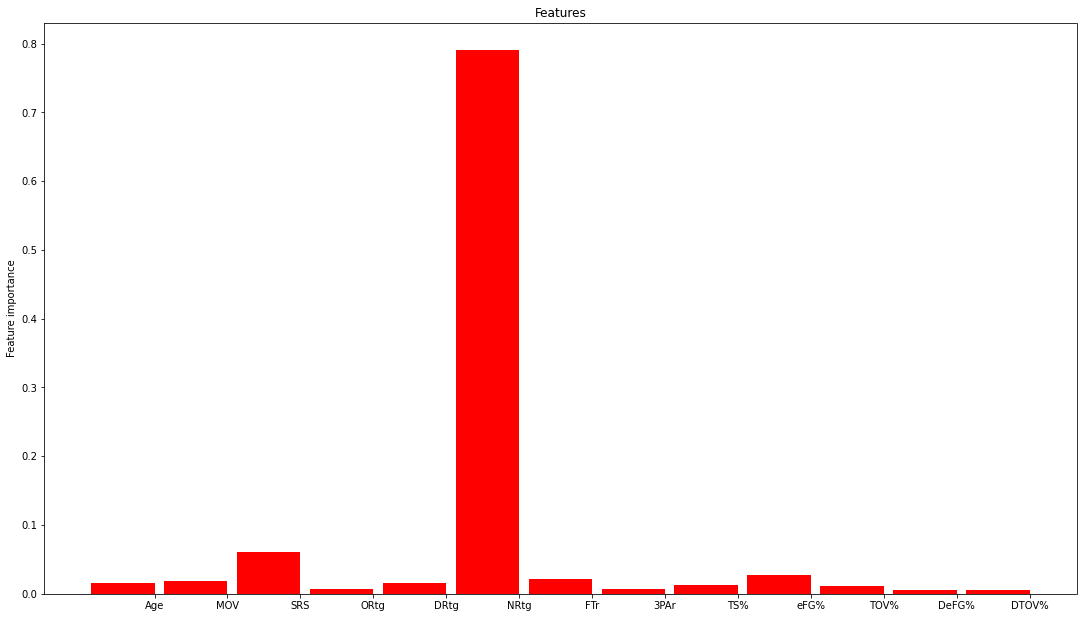

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
featureImp = clf.feature_importances_
f = len(featureImp)

numGroups=np.arange(f)
width = 1/1.15
fig, ax = plt.subplots()
rects1 = ax.bar(numGroups, featureImp, width, color='r')

fig.set_size_inches(18.5, 10.5)

ax.set_ylabel('Feature importance')
ax.set_title('Features')
ax.set_xticks(numGroups + width / 2)

ax.set_xticklabels( features)
plt.show()

Here we can see that the most important feature is actually the team's Net rating. This means that to be a championship team you need to be elite on both sidees of the ball, not just one. The second most import feature is Margin of Victor. This means if you blow teams out in the regular season you will be better in the playoffs compared to a team that scraped a bunch of wins in close contests. Another important feature here is also eFG%, so being able to shoot very well from the field as a team is also very important. We can also see here that age is also a pretty big factor comparitively, meaning that you need veteran leadership and experience to do well in the playoffs. It also shows here that Defensive rating is actually MORE important than offensive rating. This goes to show that most teams in the league have very good offense and a teams defense is what defferentiaties them from everyone else. This is why teams like the Sixers, Jazz, and Suns come out near the top, because they are very good on both sides of the ball.

# Finding the error in your code

In [3]:
##You can also look split up the data into a training and testing model to calculate your error
##As you can see there is in fact a decent bit of error with this model.
##You can toy with the stats and try and get a better result, but it is going to be hard to get a better accuracy than this
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
trainDF, testDF = train_test_split(pastDataDF, test_size = 0.2, random_state = 50, shuffle = True)
xx = trainDF[features]
yy = trainDF['RANK']
x1 = testDF[features1]
y1 = testDF['RANK']
clf2 = clf.fit(xx,yy)
pr2 = clf2.predict(x1)
pr1 = clf2.predict(xx)

r2 = r2_score(y1, pr2)
print(r2)
r2 = r2_score(yy, pr1)
print(r2)

0.6116279069767442
1.0


Finding the amount of error in your code is one of the most important parts of this project because you can see whether your model is overfitting or underfitting. In this case, my model has a case of a decent amount of overfitting. You can combat overfitting using ensemble models like bootstrapping or boosting. 

# Using XGBoost to try and combat overfitting

In [4]:
trainDF, testDF = train_test_split(pastDataDF, test_size = 0.2, random_state = 50, shuffle = True)
xx = trainDF[features]
yy = trainDF['RANK']
x1 = testDF[features1]
y1 = testDF['RANK']
print(features)
y= pastDataDF['RANK']
x = pastDataDF[features]
print(x)
X = currentDataDF[features1]

['Age', 'MOV', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'DeFG%', 'DTOV%']
       Age    MOV    SRS   ORtg   DRtg  NRtg    FTr   3PAr    TS%   eFG%  \
0    0.279 -0.085 -0.123  1.049  1.057 -0.08  0.295  0.309  0.541  0.504   
1    0.259  0.263  0.225  1.112  1.084  0.28  0.273  0.393  0.567  0.525   
2    0.260 -0.673 -0.674  1.041  1.107 -0.66  0.289  0.371  0.551  0.507   
3    0.265  0.020 -0.007  1.088  1.086  0.02  0.279  0.335  0.547  0.501   
4    0.269  0.043  0.003  1.074  1.070  0.04  0.259  0.256  0.530  0.487   
..     ...    ...    ...    ...    ...   ...    ...    ...    ...    ...   
205  0.249 -0.290 -0.208  1.057  1.088 -0.31  0.331  0.218  0.532  0.484   
206  0.289  0.772  0.800  1.105  1.024  0.81  0.240  0.257  0.571  0.537   
207  0.256  0.324  0.255  1.088  1.053  0.35  0.306  0.285  0.545  0.498   
208  0.245 -0.717 -0.627  1.035  1.113 -0.78  0.271  0.237  0.523  0.484   
209  0.263  0.127  0.048  1.060  1.046  0.14  0.248  0.246  0.

In [5]:
import xgboost as xgb
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(x)
x = pd.DataFrame((scaler.transform(x)))
xx = pd.DataFrame((scaler.transform(xx)))
x1 = pd.DataFrame((scaler.transform(x1)))
X = pd.DataFrame((scaler.transform(X)))

print(y)
print(x)
training = xgb.DMatrix(xx, label = yy)
testing = xgb.DMatrix(x1, label=y1)
fullData = xgb.DMatrix(x, label=y)
finalData = xgb.DMatrix(X)
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 31} 
epochs = 10

model = xgb.train(param, training, epochs)
model2 = xgb.train(param, fullData, epochs)

0      10
1       3
2      30
3      20
4      11
       ..
205    24
206     1
207    12
208    27
209     8
Name: RANK, Length: 210, dtype: int64
           0         1         2         3         4         5         6   \
0    0.843605 -0.176909 -0.263866 -0.885422 -0.741078 -0.162964  0.933402   
1   -0.332346  0.567008  0.497719  0.833958  0.070572  0.590096  0.170700   
2   -0.273549 -1.433873 -1.469710 -1.103756  0.761978 -1.376226  0.725393   
3    0.020439  0.047548 -0.010004  0.178956  0.130694  0.046220  0.378710   
4    0.255629  0.096715  0.011880 -0.203129 -0.350284  0.088056 -0.314656   
..        ...       ...       ...       ...       ...       ...       ...   
205 -0.920322 -0.615137 -0.449886 -0.667088  0.190816 -0.644085  2.181461   
206  1.431581  1.655094  1.756087  0.642916 -1.733095  1.698766 -0.973353   
207 -0.508739  0.697407  0.563373  0.178956 -0.861322  0.736524  1.314754   
208 -1.155512 -1.527932 -1.366853 -1.267507  0.942344 -1.627246  0.101363   
209 -

In [6]:
pred = model.predict(testing)
predDF = pd.DataFrame({"predictions":pred})

testDF['predictions']=predDF['predictions'].values
testDF

<ipython-input-6-a1c967749658>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDF['predictions']=predDF['predictions'].values


TeamID                     Team    Age     W   L  PW  PL    MOV   SOS  \
131      12          Indiana Pacers*  0.269  0.45  37  46  36  0.171 -0.09   
20       21   Oklahoma City Thunder*  0.247  0.47  35  43  39  0.076  0.39   
12       13    Los Angeles Clippers*  0.300  0.51  31  52  30  0.429  0.13   
23       24             Phoenix Suns  0.250  0.24  58  27  55 -0.563  0.49   
83       24             Phoenix Suns  0.240  0.19  63  19  63 -0.934  0.73   
174      25  Portland Trail Blazers*  0.270  0.51  31  53  29  0.423  0.18   
168      19    New Orleans Pelicans*  0.253  0.45  37  43  39  0.079  0.34   
8         9          Detroit Pistons  0.254  0.37  45  38  44 -0.112 -0.17   
103      14      Los Angeles Lakers*  0.295  0.52  19  48  23  0.579  0.49   
100      11         Houston Rockets*  0.292  0.44  28  42  30  0.296  0.17   
113      24             Phoenix Suns  0.246  0.34  39  37  36  0.022  0.35   
77       18   Minnesota Timberwolves  0.262  0.36  46  37  45 -0.150  0.48   
160      11         Houston Rockets*  0.276  0.56  26  50  32  0.344  0.38   
184       5           Chicago Bulls*  0.286  0.48  34  47  35  0.185 -0.66   
199      20          New York Knicks  0.283  0.37  45  39  43 -0.079 -0.61   
114      25  Portland Trail Blazers*  0.275  0.35  39  34  40 -0.115  0.54   
161      12           Indiana Pacers  0.283  0.38  44  42  40  0.028 -0.51   
159      10   Golden State Warriors*  0.266  0.67  15  65  17  1.010 -0.09   
25       26         Sacramento Kings  0.279  0.32  50  31  51 -0.388  0.58   
116      27        San Antonio Spurs  0.276  0.32  39  33  38 -0.111  0.46   
138      19     New Orleans Pelicans  0.266  0.30  52  31  51 -0.379  0.24   
166      17         Milwaukee Bucks*  0.246  0.41  41  42  40  0.043 -0.52   
150       1           Atlanta Hawks*  0.278  0.60  22  56  26  0.543 -0.68   
89       30       Washington Wizards  0.265  0.32  50  34  48 -0.290 -0.40   
24       25  Portland Trail Blazers*  0.248  0.41  41  40  42 -0.052  0.30   
172      23       Philadelphia 76ers  0.232  0.18  64  18  64 -0.898 -0.07   
34        5            Chicago Bulls  0.244  0.27  55  23  59 -0.704  0.20   
142      23       Philadelphia 76ers  0.233  0.10  72  16  66 -1.023  0.31   
197      18   Minnesota Timberwolves  0.263  0.40  42  48  34  0.267  0.43   
177      28         Toronto Raptors*  0.261  0.49  33  49  33  0.307 -0.62   
143      24             Phoenix Suns  0.260  0.23  59  24  58 -0.666  0.34   
121       2          Boston Celtics*  0.252  0.48  34  50  32  0.321 -0.37   
127       8           Denver Nuggets  0.247  0.33  49  33  49 -0.310  0.29   
97        8          Denver Nuggets*  0.256  0.46  27  41  32  0.211  0.24   
39       10   Golden State Warriors*  0.288  0.58  24  56  26  0.598 -0.19   
190      11         Houston Rockets*  0.254  0.54  28  53  29  0.456  0.50   
186       7        Dallas Mavericks*  0.306  0.49  33  48  34  0.240  0.50   
145      26         Sacramento Kings  0.266  0.33  49  34  48 -0.248  0.16   
61        2          Boston Celtics*  0.257  0.49  33  52  30  0.444 -0.54   
54       25  Portland Trail Blazers*  0.256  0.49  33  48  34  0.260  0.00   
162      13    Los Angeles Clippers*  0.288  0.56  26  58  24  0.659  0.22   
69       10   Golden State Warriors*  0.284  0.57  25  56  26  0.646 -0.04   

       SRS  ...  DeFG%  DTOV%   DRB%  DFT/FGA  Unnamed: 27  \
131  0.162  ...  0.489  0.143  0.760    0.205          NaN   
20   0.114  ...  0.511  0.125  0.790    0.218          NaN   
12   0.442  ...  0.506  0.121  0.769    0.211          NaN   
23  -0.514  ...  0.525  0.131  0.764    0.264          NaN   
83  -0.861  ...  0.545  0.135  0.725    0.236          NaN   
174  0.441  ...  0.476  0.113  0.762    0.182          NaN   
168  0.113  ...  0.496  0.117  0.751    0.195          NaN   
8   -0.129  ...  0.516  0.121  0.812    0.197          NaN   
103  0.628  ...  0.515  0.141  0.788    0.205          NaN   
100  0.313  ...  0.529  0.137 

In [7]:
from sklearn.metrics import accuracy_score, jaccard_score
print(r2_score(y1, pred))

0.7554817275747508


As we can see here the error is better than before, thanks to the boosting technique that we used!! Now let's predict the final NBA Rankings this year using XGBoost

# Using XGBoost To Predict the Final NBA Rankings

In [8]:
predic = model2.predict(finalData)
predicDF = pd.DataFrame({"predictions":predic})

currentDataDF['predictions']=predicDF['predictions'].values
currentDataDF = currentDataDF.sort_values('predictions')
currentDataDF

TeamID                     Team    Age     W   L  PW  PL    MOV   SOS  \
23      24            Phoenix Suns*  0.266  0.51  21  49  23  0.582 -0.15   
28      29               Utah Jazz*  0.285  0.52  20  55  17  0.925 -0.29   
12      13    Los Angeles Clippers*  0.288  0.47  25  49  23  0.618 -0.16   
22      23      Philadelphia 76ers*  0.271  0.49  23  48  24  0.558 -0.31   
9       10    Golden State Warriors  0.267  0.39  33  38  34  0.106  0.04   
7        8          Denver Nuggets*  0.261  0.47  25  47  25  0.493 -0.11   
16      17         Milwaukee Bucks*  0.281  0.46  26  48  24  0.589 -0.32   
4        5            Chicago Bulls  0.256  0.31  41  34  38 -0.089 -0.05   
25      26         Sacramento Kings  0.256  0.31  41  28  44 -0.368  0.23   
2        3           Brooklyn Nets*  0.282  0.48  24  46  26  0.450 -0.27   
6        7        Dallas Mavericks*  0.263  0.42  30  41  31  0.226 -0.01   
13      14      Los Angeles Lakers*  0.282  0.42  30  42  30  0.279 -0.03   
24      25  Portland Trail Blazers*  0.274  0.42  30  40  32  0.179  0.01   
0        1           Atlanta Hawks*  0.254  0.41  31  41  31  0.232 -0.18   
19      20         New York Knicks*  0.256  0.41  31  41  31  0.231 -0.18   
11      12           Indiana Pacers  0.265  0.34  38  36  36 -0.004 -0.08   
27      28          Toronto Raptors  0.266  0.27  45  35  37 -0.047 -0.07   
14      15       Memphis Grizzlies*  0.242  0.38  34  38  34  0.103  0.04   
18      19     New Orleans Pelicans  0.248  0.31  41  35  37 -0.029  0.10   
1        2          Boston Celtics*  0.251  0.36  36  39  33  0.146 -0.14   
15      16              Miami Heat*  0.274  0.40  32  36  36  0.003 -0.09   
26      27        San Antonio Spurs  0.262  0.33  39  32  40 -0.174  0.15   
29      30      Washington Wizards*  0.266  0.34  38  32  40 -0.183 -0.01   
5        6      Cleveland Cavaliers  0.240  0.22  50  18  54 -0.844  0.25   
3        4        Charlotte Hornets  0.246  0.33  39  32  40 -0.193 -0.01   
17      18   Minnesota Timberwolves  0.232  0.23  49  24  48 -0.556  0.31   
8        9          Detroit Pistons  0.245  0.20  52  26  46 -0.447  0.09   
21      22            Orlando Magic  0.256  0.21  51  17  55 -0.931  0.29   
10      11          Houston Rockets  0.265  0.17  55  20  52 -0.790  0.40   
20      21    Oklahoma City Thunder  0.228  0.22  50  15  57 -1.064  0.51   

      SRS  ...  FT/FGA  DeFG%  DTOV%   DRB%  DFT/FGA  \
23  0.567  ...   0.177  0.534  0.124  0.785    0.194   
28  0.897  ...   0.195  0.507  0.103  0.793    0.159   
12  0.602  ...   0.186  0.531  0.119  0.791    0.186   
22  0.528  ...   0.225  0.521  0.138  0.782    0.200   
9   0.110  ...   0.188  0.522  0.131  0.766    0.223   
7   0.482  ...   0.176  0.545  0.129  0.789    0.200   
16  0.557  ...   0.177  0.536  0.115  0.797    0.157   
4  -0.094  ...   0.156  0.538  0.116  0.803    0.196   
25 -0.345  ...   0.185  0.557  0.121  0.750    0.199   
2   0.424  ...   0.208  0.531  0.111  0.773    0.187   
6   0.226  ...   0.189  0.534  0.115  0.778    0.197   
13  0.277  ...   0.200  0.526  0.137  0.797    0.184   
24  0.181  ...   0.195  0.546  0.112  0.775    0.203   
0   0.214  ...   0.226  0.530  0.111  0.778    0.190   
19  0.213  ...   0.190  0.509  0.117  0.786    0.196   
11 -0.013  ...   0.180  0.531  0.127  0.749    0.201   
27 -0.054  ...   0.196  0.543  0.144  0.763    0.234   
14  0.107  ...   0.179  0.535  0.131  0.783    0.196   
18 -0.020  ...   0.214  0.550  0.119  0.800    0.186   
1   0.132  ...   0.181  0.539  0.128  0.781    0.215   
15 -0.006  ...   0.199  0.542  0.138  0.779    0.183   
26 -0.158  ...   0.192  0.541  0.118  0.773    0.174   
29 -0.185  ...   0.221  0.539  0.125  0.776    0.217   
5  -0.819  ...   0.194  0.556  0.130  0.766    0.183   
3  -0.194  ...   0.181  0.550  0.132  0.757    0.163   
17 -0.525  ...   0.193  0.556  0.133  0.768    0.207   
8  -0.438  ...   0.207  0.541  0.126  0.769    0.195   
21 -0.902  ...   0.186  0.547  0.115  0.782    0

Now as we saw before Net Rtg was the most important feature in our regression tree, so now lets graph that to see the variance between that certain data point

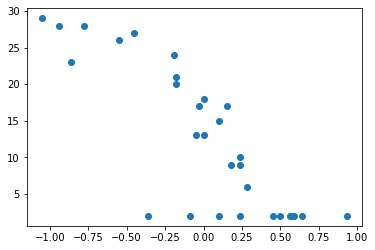

In [9]:
plt.scatter(currentDataDF['NRtg'], currentDataDF['predictions'])

So now we can actually see a visual representation of Net Rating compared to the actual Rank of the team, and it is actually a very distinct correlation, barring some outliers. We can see very clearly that as the Net Rating of a team rises, so does their rank. 
So... What does this mean?
This means that teams should attempt to build a team that is elite on both sides of the ball, not just one. Being good on both sides of the ball is what increases your Net rating the most, and makes a team the most successful. 